Olá Devs! 

Dentro da área de Visualização de Dados existe uma grande polêmica em relação a um tipo de gráfico: o gráfico de pizza ou torta. E a polêmica não é quanto ao nome, mas a quando devemos utilizar este tipo de gráfico.

Neste artigo, iremos aprender um pouco sobre essa polêmica e depois, vamos ver como podemos criar este gráfico usando as bibliotecas python seaborn, matplotlib e pandas!

## Definindo Gráfico de Pizza... ou será Torta?

O gráfico de pizza (ou torta) é um gráfico que tem por objetivo representar as categorias ou dimensões como parte de um todo. 

### Exemplo

Considere o seguinte cenário: você realizou uma votação sobre qual sabor de pizza é o mais popular. Essa votação foi feita junto aos clientes da pizzaria onde você trabalha, durante o curso de 1 semana. Hoje haverá uma reunião com o dono da pizzaria, onde vocês discutirão quais são os sabores que entrarão na próxima grande promoção da loja. Para isso, você vai apresentar os resultados da votação. E (piada interna) você decidiu que nada melhor que usar um gráfico de pizza para esta tarefa!



![Um gráfico de pizza!](pizza.jpg)

Como vocês podem ver pela deliciosa imagem acima, o gráfico de pizza é composto por um círculo, que irá representar a totalidade dos votos que foram coletados. Então, cada sabor que foi votado irá representar uma fatia desta pizza. Se olharmos os valores representados no gráfico (que são porcentagens), conseguimos ter uma idéia do quanto cada fatia representa em relação ao todo.

E, olhando essa imagem, você pode se perguntar: está tudo tão claro, onde está a polêmica? Para isso, vamos ver outra imagem:

![Exemplo de Gráfico Ruim](badpizza001.jpg)

Esse gráfico, que visa demonstrar os tweeters mais ativos, representa o principal problema dos gráficos de pizza: quanto mais categorias você tem, menos cada uma representa do todo, deixando mais díficil para o público entender essa representação. A próxima imagem ilustra o outro problema que geralmente encontramos em gráficos de pizza:

![](badpizza002.jpg)

Por algum motivo estranho, gráficos de pizza também tem uma perspectiva diferente. E essa mudança de perspectiva torna ainda pior a capacidade do público de perceber a diferença entre cada 'fatia'.

### Características de uma boa Pizza (Gráfico de Pizza)

Então, devemos usar gráficos de pizza ou não? A resposta mais simples é - depende. Baseado em inúmeros especialistas da área de visualização, você pode usar gráficos de pizza quando tem poucas categorias para serem representados. Outra recomendação é evitar mostrar o gráfico em perspectiva, além de utilizar rótulos informativos e bem simples para cada fatia.

Então, antes de ver como montar esse tipo de gráfico, vamos ficar com uma imagem que reforça o aprendizado até aqui:

![](goodpie-badpie.png)

## Utilização básica

Para criar o gráfico de pizza teremos que abandonar um pouco o seaborn, e nos concentrarmos em utilizar apenas o matplotlib. Já estamos usando parte do matplotlib para colocarmos títulos no gráfico e nos eixos, acertarmos faixas de valores nos eixos e mais alguns detalhes. Agora, iremos utiliza-lo também para plotar o gráfico. Em primeiro lugar, vamos inicializar o ambiente e carregar os dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pokemons = pd.read_csv('pokemons.csv')

Depois, fazemos a agregação dos dados no nível da categoria que vamos plotar. Para criarmos um gráfico de pizza bom, vamos plotar o número de pokemons por geração. Isso nos dará poucas categorias (8), e faz sentido ver a distribuição do número de pokemons. Se quiséssemos plotar qualquer outro atributo, como ataque, defesa, etc..., provavelmente um gráfico de pizza não seria indicado, pois não faz sentido representar a soma dos poderes de ataque dos pokemons como um todo.

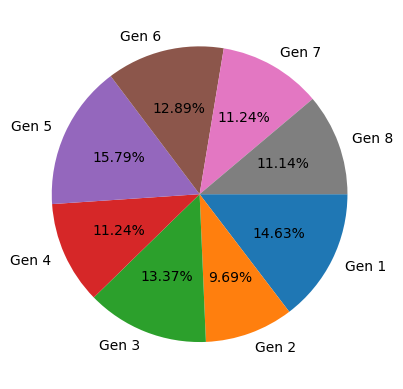

In [2]:
pokemons['Generation Desc'] = pokemons['Generation'].apply(lambda gen: 'Gen ' + str(int(gen)))

pokemons_gen = pokemons.groupby(['Generation Desc'])[['Generation','Number']].count().reset_index()
pokemons_gen.sort_values('Generation Desc', inplace=True)

plt.pie(pokemons_gen['Number'], labels=pokemons_gen['Generation Desc'], autopct="%.2f%%", counterclock=False)

plt.show()

E aí está o nosso gráfico de pizza! Importante observar que novamente, fizemos algumas transformações nos dados, incluindo ordenar os dados, porque caso contrário, as fatias ficarão fora de ordem. Vamos adicionar título e legenda, como em todos os nossos outros gráficos.

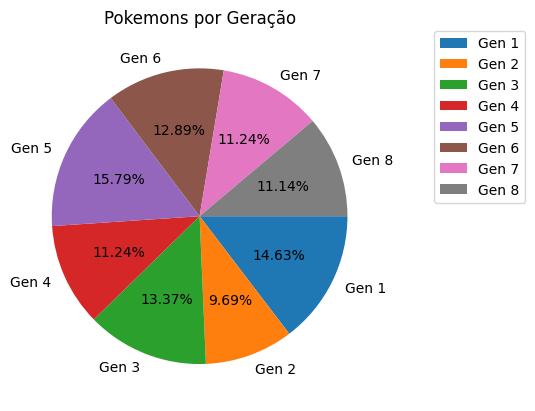

In [3]:
pokemons['Generation Desc'] = pokemons['Generation'].apply(lambda gen: 'Gen ' + str(int(gen)))

pokemons_gen = pokemons.groupby(['Generation Desc'])[['Generation','Number']].count().reset_index()
pokemons_gen.sort_values('Generation Desc', inplace=True)

plt.pie(pokemons_gen['Number'], labels=pokemons_gen['Generation Desc'], autopct="%.2f%%", counterclock=False)

plt.title('Pokemons por Geração')
plt.legend(loc='upper right', bbox_to_anchor=(1.40,1.02))

plt.show()

Pronto, aí está o polêmico gráfico de pizza!

### Conclusão

Neste artigo, aprendemos como criar gráficos que nos ajudam a entender como nossas variáveis categóricas se relacionam enquanto partes de um todo. E para isto utilizamos o tão famoso gráfico de Pizza. Também aprendemos em quais casos este tipo de gráfico faz sentido e quando sua utilização prejudica a compreensão dos dados. Se quiser saber mais sobre gráficos de pizza, [clique aqui](https://ibpad.com.br/ciencia-dados/sete-erros-classicos-em-graficos-de-pizza/).

Um abraço e até a próxima,

Walter.